## Пишем код

In [1]:
import numpy as np
from random import randint, uniform
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score, log_loss
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [2]:
def gen_list(x_min, x_max, lenght):
    lst = []
    for i in range(lenght):
        lst.append(randint(x_min, x_max))
    return lst

def gen_bool_list(lenght):
    lst = []
    for i in range(lenght):
        lst.append(randint(0, 1))
    return lst

def gen_true_valid_list(lenght, sublenght):
    lst = []
    for i in range(lenght):
        sublst = []
        for k in range(sublenght):
            sublst.append(0)
        sublst[randint(0, sublenght-1)] += 1
        lst.append(sublst)
    return lst

def gen_pred_valid_list(lenght, sublenght):
    lst = []
    for i in range(lenght):
        sublst = []
        for k in range(sublenght):
            sublst.append(randint(0, 100))
        fin_sublst = []
        for k in range(sublenght):
            fin_sublst.append(sublst[k] / sum(sublst))
        lst.append(fin_sublst)
    return lst

def std_devi(lst):
    av_lst = sum(lst) / len(lst)
    sum1 = 0
    for i in range(len(lst)):
        sum1 += math.fabs(lst[i] - av_lst)
    std_devi = sum1 / len(lst)
    return float(round(std_devi, 2))

def dispers(lst):
    av_lst = sum(lst) / len(lst)
    sum1 = 0
    for i in range(len(lst)):
        sum1 += (lst[i] - av_lst)**2
    dispers = sum1 / len(lst)
    return float(round(dispers, 2))

def mae(lst_pred, lst_true):
    if len(lst_pred) != len(lst_true):
        print('Разные размеры списков. Проверьте значения')
    else:
        sum1 = 0
        for i in range(len(lst_pred)):
            sum1 += math.fabs(lst_true[i] - lst_pred[i])
        mae = sum1 / len(lst_true)
        return float(round(mae, 2))

def mse(lst_pred, lst_true):
    if len(lst_pred) != len(lst_true):
        print('Разные размеры списков. Проверьте значения')
    else:
        sum1 = 0
        for i in range(len(lst_pred)):
            sum1 += (lst_true[i] - lst_pred[i])**2
        mse = sum1 / len(lst_true)
        return float(round(mse, 2))

def accur(lst_pred, lst_true):
    if len(lst_pred) != len(lst_true):
        raise Exception('Разные размеры списков. Проверьте значения')
    else:
        for i in range(len(lst_pred)):
            if lst_pred[i] != bool(lst_pred[i]):
                raise Exception(f'Ошибка {[i]} элемента 1 списка. Принимаются только значения 1 и 0 (нынешнее: {lst_pred[i]})')
            else:
                if lst_true[i] != bool(lst_true[i]):
                    raise Exception(f'Ошибка {[i]} элемента 2 списка. Принимаются только значения 1 и 0 (нынешнее: {lst_true[i]})')
    sum1 = 0
    for i in range(len(lst_pred)):
        if lst_pred[i] == lst_true[i]:
            sum1 += 1
        else:
            sum1 += 0
    accur = sum1 / len(lst_pred)
    return accur

def counter(lst_pred, lst_true):
    if len(lst_pred) != len(lst_true):
        raise Exception('Разные размеры списков. Проверьте значения')
    else:
        for i in range(len(lst_pred)):
            if lst_pred[i] != bool(lst_pred[i]):
                raise Exception(f'Ошибка {[i]} элемента 1 списка. Принимаются только значения 1 и 0 (нынешнее: {lst_pred[i]})')
            else:
                if lst_true[i] != bool(lst_true[i]):
                    raise Exception(f'Ошибка {[i]} элемента 2 списка. Принимаются только значения 1 и 0 (нынешнее: {lst_true[i]})')
    pairs = []
    for i in range(len(lst_pred)):
        pairs.append((lst_pred[i], lst_true[i]))
    pair_counts = Counter(pairs)
    return pair_counts

def precision(lst_pred, lst_true):
    counters = counter(lst_pred, lst_true)
    TP = counters.get((1, 1), 0)
    FP = counters.get((0, 1), 0)
    FN = counters.get((1, 0), 0)
    precision = TP / (TP + FP)
    print(round(precision, 2))

def recall(lst_pred, lst_true):
    counters = counter(lst_pred, lst_true)
    TP = counters.get((1, 1), 0)
    FP = counters.get((0, 1), 0)
    FN = counters.get((1, 0), 0)
    recall = TP / (TP + FN)
    print(round(recall, 2))

def f1(lst_pred, lst_true):
    counters = counter(lst_pred, lst_true)
    TP = counters.get((1, 1), 0)
    FP = counters.get((0, 1), 0)
    FN = counters.get((1, 0), 0)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1 = 2 * (precision * recall) / (precision + recall)
    print(round(f1, 2))

def cross_enthropy_loss(lst_pred, lst_true):
    a = 0.000000000001
    sum1 = 0
    for yp, yt in zip(lst_pred, lst_true):
        sum1 += yt * math.log(yp + a)
    return -sum1

def array_cross_enthropy_loss(lst_pred, lst_true):
    sum1 = 0
    for y_pred, y_true in zip(lst_pred, lst_true):
        sum1 += cross_enthropy_loss(y_pred, y_true)
        cel = sum1 / len(lst_pred)
    return cel

def log_cosh_loss(lst_pred, lst_true):
    return np.mean(np.log(np.cosh(lst_pred - lst_true)))

## Проверяем функции ошибок

In [3]:
lst1_pred = gen_list(0, 10, 10)
lst1_true = gen_list(0, 10, 10)
print(lst1_pred)
print(lst1_true)

[1, 0, 3, 10, 9, 4, 0, 0, 4, 8]
[7, 8, 8, 5, 7, 3, 7, 8, 1, 8]


In [4]:
std_devi(lst1_pred)

3.1

In [5]:
dispers(lst1_pred)

13.49

In [6]:
mae(lst1_pred, lst1_true)

4.5

In [7]:
mean_absolute_error(lst1_pred, lst1_true)

4.5

In [8]:
mse(lst1_pred, lst1_true)

27.7

In [9]:
mean_squared_error(lst1_pred, lst1_true)

27.7

In [10]:
lst1_pred = np.array(lst1_pred)
lst1_true = np.array(lst1_true)

In [11]:
log_cosh_loss(lst1_pred, lst1_true)

3.8909326997649627

In [12]:
lst2_pred = gen_bool_list(20)
lst2_true = gen_bool_list(20)
print(lst2_pred)
print(lst2_true)

[0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1]
[0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1]


In [13]:
accur(lst2_pred, lst2_true)

0.65

In [14]:
accuracy_score(lst2_pred, lst2_true)

0.65

In [15]:
precision(lst2_pred, lst2_true)

0.67


In [16]:
round(precision_score(lst2_pred, lst2_true), 2)

0.67

In [17]:
recall(lst2_pred, lst2_true)

0.73


In [18]:
round(recall_score(lst2_pred, lst2_true), 2)

0.73

In [19]:
f1(lst2_pred, lst2_true)

0.7


In [20]:
round(f1_score(lst2_pred, lst2_true), 2)

0.7

In [21]:
lst3_pred = gen_pred_valid_list(10, 4)
lst3_true = gen_true_valid_list(10, 4)
print(lst3_pred)
print(lst3_true)

[[0.06334841628959276, 0.27601809954751133, 0.2579185520361991, 0.40271493212669685], [0.29213483146067415, 0.299625468164794, 0.2808988764044944, 0.12734082397003746], [0.34275618374558303, 0.24028268551236748, 0.27208480565371024, 0.14487632508833923], [0.1762295081967213, 0.4098360655737705, 0.09836065573770492, 0.3155737704918033], [0.14601769911504425, 0.3938053097345133, 0.28761061946902655, 0.17256637168141592], [0.2922374429223744, 0.4063926940639269, 0.0, 0.3013698630136986], [0.3671875, 0.15234375, 0.33984375, 0.140625], [0.12631578947368421, 0.48947368421052634, 0.22631578947368422, 0.15789473684210525], [0.46190476190476193, 0.2523809523809524, 0.22857142857142856, 0.05714285714285714], [0.0196078431372549, 0.4117647058823529, 0.5392156862745098, 0.029411764705882353]]
[[0, 0, 0, 1], [0, 0, 1, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0, 1, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1], [1, 0, 0, 0]]


In [22]:
round(array_cross_enthropy_loss(lst3_pred, lst3_true), 2)

1.62

In [23]:
round(log_loss(lst3_true, lst3_pred), 2)

1.62

## Линейная регрессия

### Одномерная линейная регрессия

In [24]:
def func(x):
    return x ** 2

def gr_func(x):
    return 2 * x

Итерация: 0
Текущая точка 5| Следующая точка 4.0
--------------------------------------------------------
Итерация: 1
Текущая точка 4.0| Следующая точка 3.2
--------------------------------------------------------
Итерация: 2
Текущая точка 3.2| Следующая точка 2.56
--------------------------------------------------------
Итерация: 3
Текущая точка 2.56| Следующая точка 2.048
--------------------------------------------------------
Итерация: 4
Текущая точка 2.048| Следующая точка 1.6384
--------------------------------------------------------
Итерация: 5
Текущая точка 1.6384| Следующая точка 1.31072
--------------------------------------------------------
Итерация: 6
Текущая точка 1.31072| Следующая точка 1.0485760000000002
--------------------------------------------------------
Итерация: 7
Текущая точка 1.0485760000000002| Следующая точка 0.8388608000000002
--------------------------------------------------------
Итерация: 8
Текущая точка 0.8388608000000002| Следующая точка 0.671088640

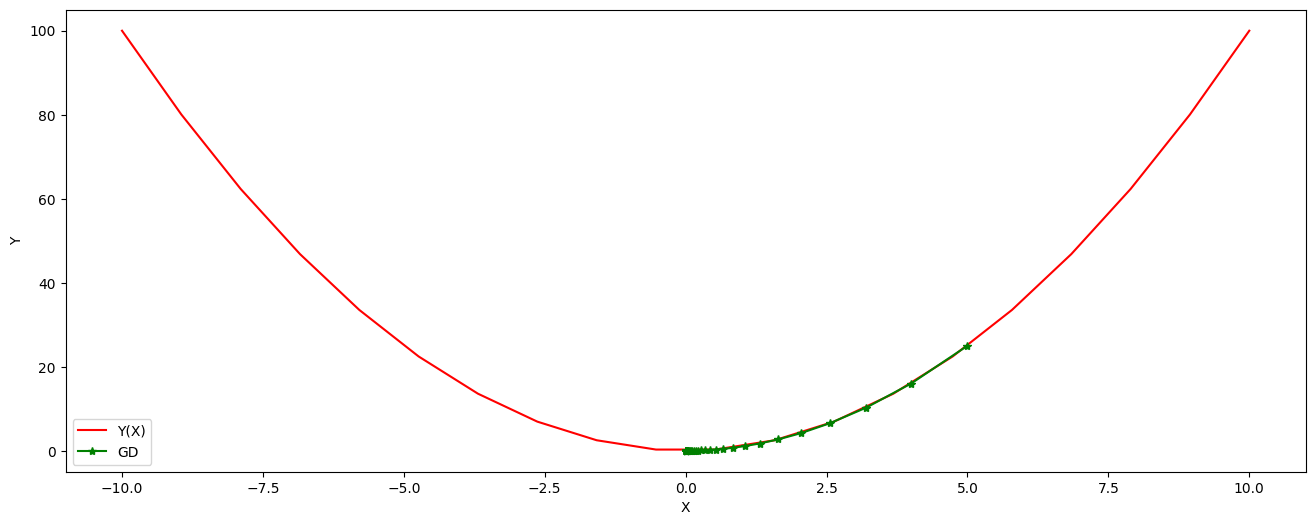

In [25]:
eps = 0.0001
start_point = 5
learning_rate = 0.1
next_point = start_point

x = []
x.append(next_point)

D = 10

X = np.linspace(-D, +D, 20)
Y = func(X)

plt.figure(figsize=(16, 6))
plt.plot(X, Y, 'r', label='Y(X)')

n = 100
for i in range(n):
    current_point = next_point

    next_point = current_point - learning_rate * gr_func(current_point)
    x.append(next_point)

    print(f"Итерация: {i}")
    print(f"Текущая точка {current_point}| Следующая точка {next_point}")
    print("--------------------------------------------------------")

    if(abs(current_point - next_point) <= eps):
        break

print(f"минимум {next_point}, количество затраченных итераций: {i}")
X_grad = np.array(x)
plt.plot(X_grad, func(X_grad), '-*g', label = 'GD')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [84]:
X, y, coeffs = make_regression(n_samples=50, n_features=1, n_informative=1,
                       noise=10, coef=True, random_state=5)

display(X, y)

array([[-0.00619491],
       [ 0.10960984],
       [ 0.10073819],
       [ 0.26961241],
       [-0.05230815],
       [-0.10593044],
       [ 0.19766009],
       [-0.10061435],
       [ 0.35543847],
       [ 0.6034716 ],
       [-0.98060789],
       [-0.33087015],
       [-0.10106761],
       [-0.47773142],
       [-0.35882895],
       [-0.87187918],
       [ 0.24921766],
       [-0.59163666],
       [ 0.4944404 ],
       [-1.51117956],
       [-0.9092324 ],
       [ 2.43077119],
       [ 0.99643983],
       [-0.36331088],
       [-0.42250793],
       [-0.30585302],
       [ 1.15139101],
       [-0.25209213],
       [-0.20487651],
       [-0.08687561],
       [ 1.13934298],
       [-0.32986996],
       [ 1.29196338],
       [-0.33633626],
       [-0.63157163],
       [ 1.56153229],
       [-1.66478853],
       [ 0.18760323],
       [ 0.00328884],
       [ 0.44122749],
       [ 0.79305332],
       [ 1.85733101],
       [ 1.33484857],
       [ 0.71242127],
       [-0.85685315],
       [ 0

array([ -3.30585732,  18.99042238,   4.80550251,  13.34829038,
        -2.31742667,  -7.95827838,  18.28139971,  -7.63508795,
        22.04303243,  36.99387264, -53.05511043, -29.5157668 ,
         1.4456274 , -18.47603558, -20.72585265, -45.32741565,
         5.17538347, -34.42627095,  14.60063393, -68.72859275,
       -23.02618092, 140.32310385,  52.36268843,  -7.51543715,
       -23.5057377 ,  -6.59675821,  63.40917088, -20.28618665,
       -35.19897123,   3.26711791,  56.16958964, -20.8643009 ,
        68.37399875,  -5.05355054, -29.06686129,  95.20058249,
       -91.51298284,   2.88304865,   6.713746  ,  19.16446264,
        42.2221697 , 113.3968336 ,  75.99290211,  25.40192279,
       -50.25727627,  -6.97633483,  32.77324587, -48.23468985,
        72.61323181, -63.03569989])

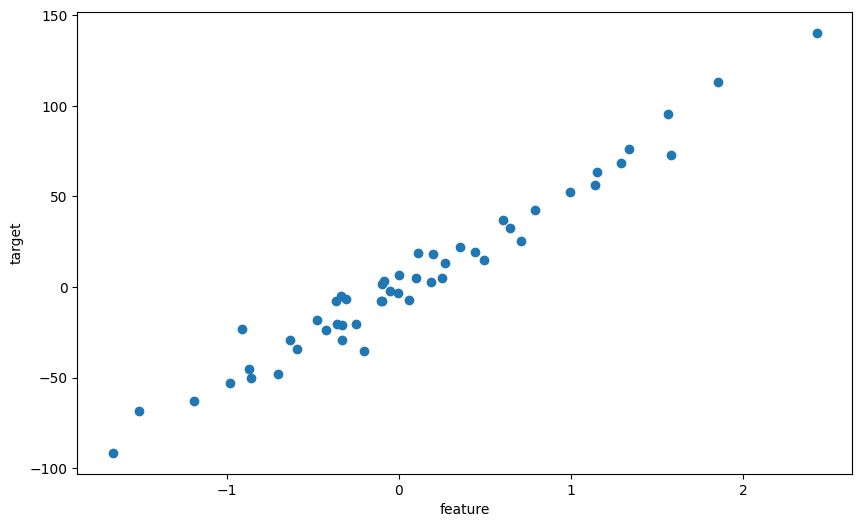

In [85]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(X, y)

plt.xlabel('feature')
plt.ylabel('target')
plt.show()

In [86]:
model = LinearRegression()
model.fit(X, y)
model_a = model.coef_[0]
model_b = model.intercept_
print(model_a, model_b)

53.515420115303996 0.5060501738990792


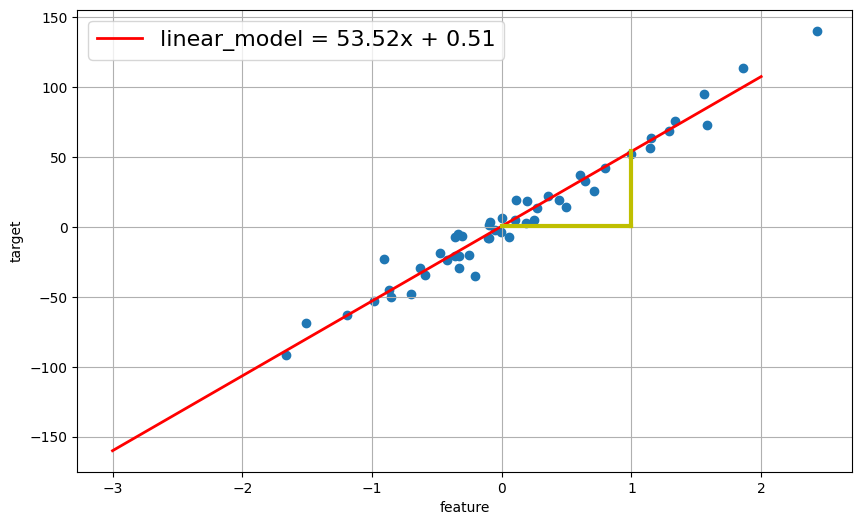

In [87]:
fig = plt.figure(figsize=(10, 6))

x = np.arange(-3, 3)
model_y_sk = model_a * x + model_b

plt.plot(x, model_y_sk, linewidth=2, c='r', label=f'linear_model = {model_a:.2f}x + {model_b:.2f}')
plt.scatter(X, y)
plt.plot([0, 1], [model_b, model_b], 'y', linewidth=3)
plt.plot([1, 1], [model_b, model_b+model_a], 'y', linewidth=3)
plt.grid()
plt.xlabel('feature')
plt.ylabel('target')
plt.legend(prop={'size': 16})
plt.show()

In [88]:
def mserror(X, w1, w0, y):
    y_pred = w1 * X[:, 0] + w0
    return np.sum((y - y_pred) ** 2) / len(y_pred)

def gr_mserror(X, w1, w0, y):
    y_pred = w1 * X[:, 0] + w0
    return np.array([2/len(X)*np.sum((y - y_pred)) * (-1),
                     2/len(X)*np.sum((y - y_pred) * (-X[:, 0]))])

In [89]:
eps = 0.001

w1 = 0
w0 = 0

learning_rate = 0.1

next_w1 = w1
next_w0 = w0

for i in range(100):      # или while (abs(cur_w1 - next_w1) <= eps) and (abs(cur_w0 - next_w0) <= eps):

    cur_w1 = next_w1
    cur_w0 = next_w0

    next_w0 = cur_w0 - learning_rate * gr_mserror(X, cur_w1, cur_w0, y)[0]
    next_w1 = cur_w1 - learning_rate * gr_mserror(X, cur_w1, cur_w0, y)[1]

    if (abs(cur_w1 - next_w1) <= eps) and (abs(cur_w0 - next_w0) <= eps):
        break

    print(f"Итераций: {i}")
    print(f"Текущая точка {cur_w1, cur_w0}")
    print(f"MSE {mserror(X, cur_w1, cur_w0, y)}")
    print("----------------------------------------------------------")

Итераций: 0
Текущая точка (0, 0)
MSE 2162.5029259321414
----------------------------------------------------------
Итераций: 1
Текущая точка (7.785532686722551, 1.1333972662006413)
MSE 1590.5347363193764
----------------------------------------------------------
Итераций: 2
Текущая точка (14.417969566800423, 1.8899503712745322)
MSE 1178.4170996864514
----------------------------------------------------------
Итераций: 3
Текущая точка (20.072123506988003, 2.3672686673879872)
MSE 880.4183339148502
----------------------------------------------------------
Итераций: 4
Текущая точка (24.895524468535633, 2.6400679051251084)
MSE 664.2525071976429
----------------------------------------------------------
Итераций: 5
Текущая точка (29.012825267994078, 2.7652751772111746)
MSE 507.0049070864867
----------------------------------------------------------
Итераций: 6
Текущая точка (32.529468720068046, 2.7860278966746295)
MSE 392.33174071853813
------------------------------------------------------

In [90]:
print('Коэффициенты наклона', end=' ')
print(f'True {coeffs}, trained {next_w1}')

print('Коэффициенты сдвига', end=' ')
print(f'True 0, trained {next_w0}')

Коэффициенты наклона True 54.63583485408069, trained 53.509386716297655
Коэффициенты сдвига True 0, trained 0.5079467136318428


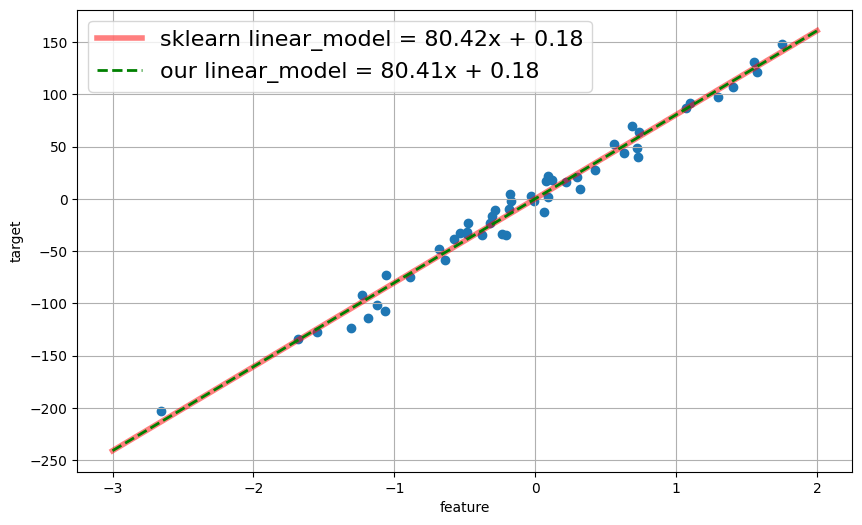

In [43]:
fig = plt.figure(figsize=(10, 6))

x = np.arange(-3, 3)
our_model_y = next_w1 * x + next_w0

plt.plot(x, model_y_sk, linewidth=4, alpha=0.5, c='r', label=f'sklearn linear_model = {model_a:.2f}x + {model_b:.2f}')
plt.plot(x, our_model_y, '--g', linewidth=2, label=f'our linear_model = {next_w1:.2f}x + {next_w0:.2f}')
plt.scatter(X, y)
plt.grid()
plt.xlabel('feature')
plt.ylabel('target')
plt.legend(prop={'size': 16})
plt.show()

### Многомерная линейная регрессия

In [77]:
X, y = make_regression(n_samples=50, n_features=4, n_informative=4,
                       noise=10, random_state=5)

display(X, y)

array([[ 2.52080763,  1.01813761,  0.49832921, -0.84646862],
       [ 0.52184949,  0.39042061, -1.06503262,  0.30560017],
       [ 0.51725935,  0.41367881, -0.56705117, -0.51025606],
       [ 0.24921766, -0.10106761, -0.00619491, -0.05230815],
       [-0.01694532,  2.23796561,  0.45765807, -1.4812592 ],
       [ 1.14720208, -0.57321556, -1.26408334,  0.24981732],
       [ 0.34650175,  0.54856784, -0.64635659,  0.21054246],
       [-2.24911813, -0.74790579, -1.7811513 , -0.36840953],
       [-0.20487651, -0.32986996,  0.18760323, -1.19276461],
       [ 0.12480683,  2.26010677, -0.10716398,  0.65661947],
       [-0.48713265,  0.72695326, -1.23238611,  0.04595522],
       [-0.41417827, -0.17170905, -1.03849524,  0.47634618],
       [-1.16727845, -0.28143012,  0.81613236, -2.33562182],
       [ 0.03654264, -0.0347021 ,  2.23327081, -1.27962318],
       [ 0.61784475, -0.23998173,  0.02421074,  0.91011056],
       [-0.6346525 ,  1.46520488,  1.73844881,  1.21228341],
       [-0.36331088,  0.

array([ 6.79077625e+01,  4.28540739e+01, -2.67478576e+01, -1.52986333e+01,
        1.88998824e+00, -3.19684771e+00,  5.16252666e+01, -1.65712447e+02,
       -1.32636581e+02,  1.94932728e+02,  1.96605683e+01, -3.61350474e+00,
       -2.55052782e+02, -7.84316234e+01,  9.62502262e+01,  2.33403054e+02,
        5.66718929e+01, -2.42925875e-02,  1.49544530e+02, -1.51773371e+02,
        2.02954928e+02, -8.12897541e+01,  2.38890719e+01, -1.24303697e+02,
       -6.67023536e+01,  2.42087155e+01, -7.10814950e+01,  7.25852605e+01,
        1.22080715e+02,  1.64902972e+01, -7.69017972e+01,  3.13223912e+01,
        1.74371380e+02, -1.38966757e+02, -5.12424724e+01, -2.36036140e+01,
        2.78438779e+01, -1.63657384e+02, -7.16059434e+00,  9.60647255e+01,
       -4.40401385e+01,  1.07226616e+02,  6.88096712e+01, -1.51973885e+01,
        2.12024584e+02, -3.73139829e+01, -9.75856317e+01, -1.42612743e+02,
        1.15106802e+02,  3.01099669e+01])

In [80]:
model = LinearRegression()
model.fit(X, y)
model.coef_, model.intercept_

(array([24.19920747, 64.24424263, 19.3631286 , 93.43390167]),
 -2.298104054925936)